metadata https://rdrr.io/cran/AER/man/CASchools.html

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg

from scipy import stats

In [17]:
from statsmodels.compat import lzip

In [5]:
df = pd.read_csv("caschool.csv", engine='python')

print ("Row and columns = ", df.shape)
df.head()

Row and columns =  (420, 18)


,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024


In [6]:
df.columns

Index(['Observation Number', 'dist_cod', 'county', 'district', 'gr_span',
       'enrl_tot', 'teachers', 'calw_pct', 'meal_pct', 'computer', 'testscr',
       'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct', 'read_scr',
       'math_scr'],
      dtype='object')

### Pearson correlation

In [18]:
pearsonc = stats.pearsonr(df['testscr'], df['avginc'])
name =  ["Coefficient", "p value"]
lzip(name, pearsonc)

[('Coefficient', 0.7124308316760397), ('p value', 2.751833507384696e-66)]

In [8]:
help(stats.pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

### Spearman correlation

In [19]:
spearmanc = stats.spearmanr(df['testscr'], df['avginc'])
name =  ["Coefficient", "p value"]
lzip(name, spearmanc)

[('Coefficient', 0.6897405358562295), ('p value', 1.3683335426820145e-60)]

### Creating first model

In [25]:
model = smf.ols('testscr ~avginc', data=df)
model_fit = model.fit()

#model_fit = smf.ols('testscr ~avginc', data=df).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     430.8
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           2.75e-66
Time:                        15:36:03   Log-Likelihood:                -1684.5
No. Observations:                 420   AIC:                             3373.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.3836      1.532    408.106      0.0

In [26]:
dir(model_fit)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

In [31]:
model_fit.resid

0      22.792119
1      17.361563
2       1.350780
3       5.450817
4      -1.591458
         ...    
415    24.970164
416     2.966831
417   -24.967195
418    28.121110
419     6.880795
Length: 420, dtype: float64

## Diagnostics for the first model

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

### Linearlity

In [38]:
help(sms.linear_harvey_collier)

Help on function linear_harvey_collier in module statsmodels.stats.diagnostic:

linear_harvey_collier(res, order_by=None)
    Harvey Collier test for linearity
    
    The Null hypothesis is that the regression is correctly modeled as linear.
    
    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    order_by : array_like, default None
        Integer array specifying the order of the residuals. If not provided,
        the order of the residuals is not changed. If provided, must have
        the same number of observations as the endogenous variable.
    
    Returns
    -------
    tvalue : float
        The test statistic, based on ttest_1sample.
    pvalue : float
        The pvalue of the test.
    
    Notes
    -----
    This test is a t-test that the mean of the recursive ols residuals is zero.
    Calculating the recursive residuals might take some time for large samples.



In [72]:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(model_fit)
lzip(name, test)

[('t value', 15.234032545944318), ('p value', 5.841712400696894e-42)]

Let significance level = 0.05

p-value = 0.0000

As p-value <=0.05 , we can conclude that linearity assumption is violated. 

Text(0, 0.5, 'Residual')

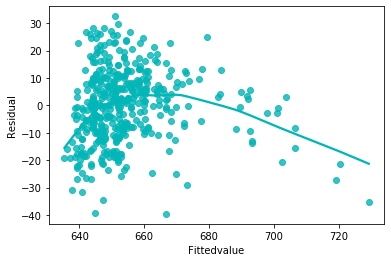

In [37]:
sns.regplot(model_fit.fittedvalues, 
                model_fit.resid, 
                data=df, 
                lowess=True,  
                color='#01B6B7')

plt.xlabel('Fittedvalue')
plt.ylabel('Residual')

### Independence

https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

Durbin-Watson:  0.650

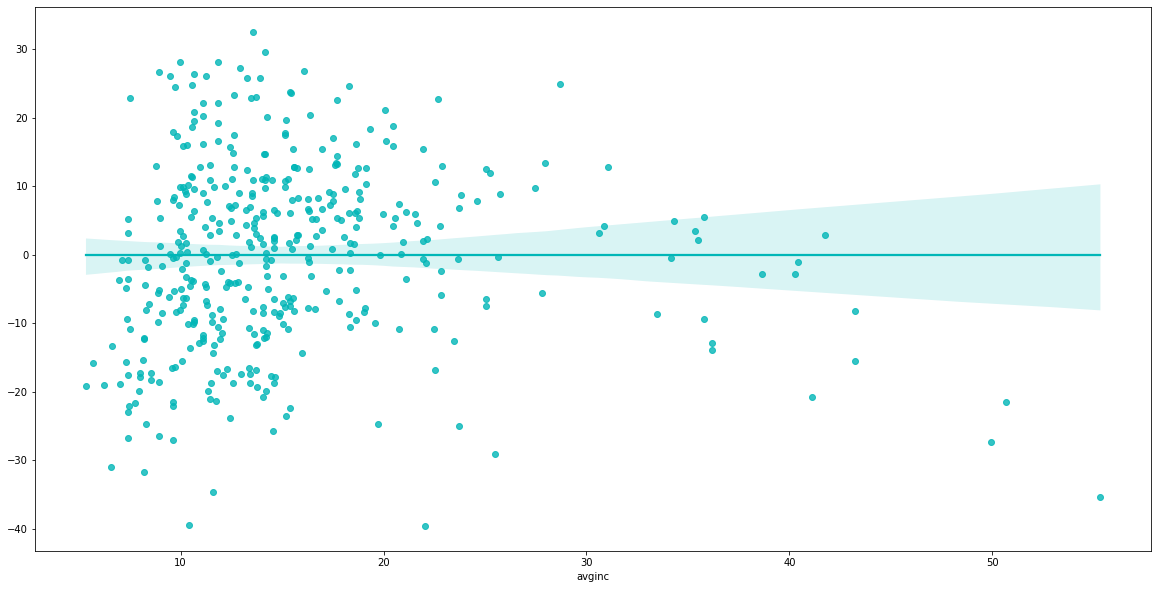

In [40]:
plt.rc('figure', figsize=(20,10))

sns.regplot(df['avginc'], model_fit.resid , 
                  data=df,  color='#01B6B7')

### Normality

In [45]:
help(sms.jarque_bera)

Help on function jarque_bera in module statsmodels.stats.stattools:

jarque_bera(resids, axis=0)
    The Jarque-Bera test of normality.
    
    Parameters
    ----------
    resids : array_like
        Data to test for normality. Usually regression model residuals that
        are mean 0.
    axis : int, optional
        Axis to use if data has more than 1 dimension. Default is 0.
    
    Returns
    -------
    JB : {float, ndarray}
        The Jarque-Bera test statistic.
    JBpv : {float, ndarray}
        The pvalue of the test statistic.
    skew : {float, ndarray}
        Estimated skewness of the data.
    kurtosis : {float, ndarray}
        Estimated kurtosis of the data.
    
    Notes
    -----
    Each output returned has 1 dimension fewer than data
    
    The Jarque-Bera test statistic tests the null that the data is normally
    distributed against an alternative that the data follow some other
    distribution. The test statistic is based on two moments of the data,
  

In [46]:
jarque = sms.jarque_bera(model_fit.resid)

names = ['Test stattics', 'p-value' , 'skew', 'kurtosis']
lzip(names, jarque)

[('Test stattics', 2.480011745487751),
 ('p-value', 0.28938251846464735),
 ('skew', -0.14759289577296486),
 ('kurtosis', 2.76637571754114)]

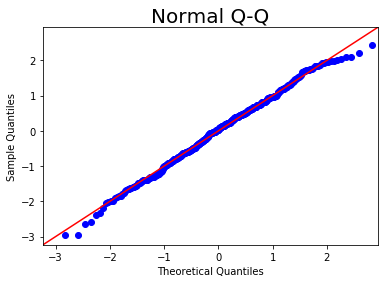

In [43]:
plt.rc('figure', figsize=(6,4))
probplot  = smg.qqplot(model_fit.resid, fit=True, line="45")

plt.title('Normal Q-Q', fontsize=20)
plt.show()

### Heteroskedascity

In [49]:
help(het_white)

Help on function het_white in module statsmodels.stats.diagnostic:

het_white(resid, exog)
    White's Lagrange Multiplier Test for Heteroscedasticity.
    
    Parameters
    ----------
    resid : array_like
        The residuals. The squared residuals are used as the endogenous
        variable.
    exog : array_like
        The explanatory variables for the variance. Squares and interaction
        terms are automatically included in the auxiliary regression.
    
    Returns
    -------
    lm : float
        The lagrange multiplier statistic.
    lm_pvalue :float
        The p-value of lagrange multiplier test.
    fvalue : float
        The f-statistic of the hypothesis that the error variance does not
        depend on x. This is an alternative test variant not the original
        LM test.
    f_pvalue : float
        The p-value for the f-statistic.
    
    Notes
    -----
    Assumes x contains constant (for counting dof).
    
    question: does f-statistic make sense? con

In [50]:
from statsmodels.stats.api import het_white
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]

test = het_white(model_fit.resid, model_fit.model.exog)

lzip(name, test)

[('Lagrange multiplier statistic', 25.02860405604711),
 ('p-value', 3.6737338031689657e-06),
 ('f-value', 13.212257898357608),
 ('f p-value', 2.731869286255225e-06)]

In [75]:
print("Breush-Pagan test:")
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)
lzip(name, test)

Breush-Pagan test:


[('Lagrange multiplier statistic', 0.07868804387878292),
 ('p-value', 0.7790832684859628),
 ('f-value', 0.07832801385599489),
 ('f p-value', 0.7797145934511552)]

In [76]:
print("Goldfeld-Quandt test:")
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model_fit.resid, model_fit.model.exog)
lzip(name, test)

Goldfeld-Quandt test:


[('F statistic', 0.6354101327810716), ('p-value', 0.9994277828994063)]

### Creating alternative model

### 1. log regression model

In [51]:
df['log_testscr'] = np.log(df['testscr'])

In [53]:
df.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,log_testscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,6.537850
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,6.494056
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,6.467077
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,6.473428
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,6.462795


In [54]:
model2 = smf.ols('log_testscr ~avginc ', data=df)

model2_fit = model2.fit()
print(model2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            log_testscr   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     415.0
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.41e-64
Time:                        16:16:52   Log-Likelihood:                 1034.7
No. Observations:                 420   AIC:                            -2065.
Df Residuals:                     418   BIC:                            -2057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4394      0.002   2724.161      0.0

### Linearity

Text(0, 0.5, 'Residual')

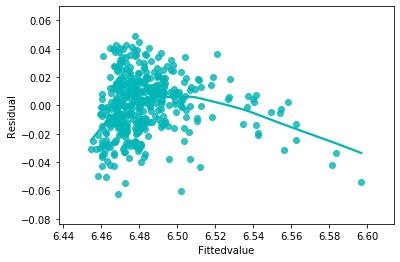

In [56]:
sns.regplot(model2_fit.fittedvalues, 
                model2_fit.resid, 
                data=df, 
                lowess=True,  
                color='#01B6B7')

plt.xlabel('Fittedvalue')
plt.ylabel('Residual')

In [58]:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(model2_fit)
lzip(name, test)

[('t value', 15.150618564756465), ('p value', 1.3244115424471496e-41)]

### Independence

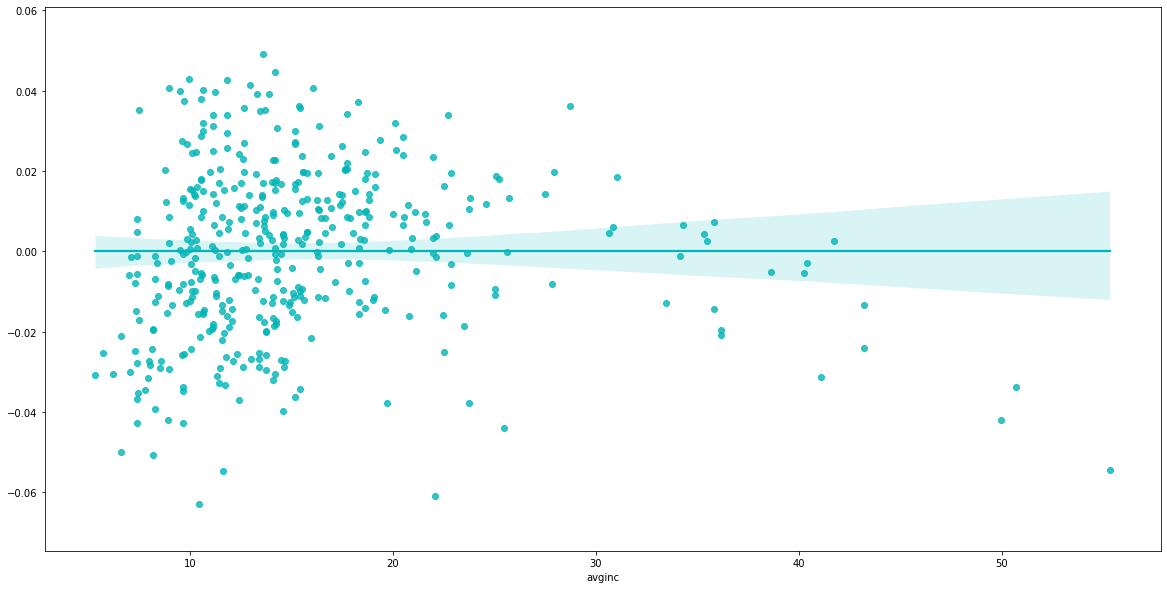

In [59]:
plt.rc('figure', figsize=(20,10))

sns.regplot(df['avginc'], model2_fit.resid , 
                  data=df,  color='#01B6B7')

### Normality

In [60]:
jarque = sms.jarque_bera(model2_fit.resid)

names = ['Test stattics', 'p-value' , 'skew', 'kurtosis']
lzip(names, jarque)

[('Test stattics', 3.53750575606874),
 ('p-value', 0.1705455473528997),
 ('skew', -0.20016309552074732),
 ('kurtosis', 2.7953487678334685)]

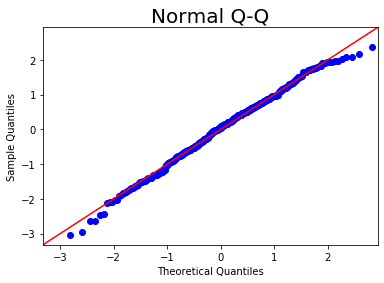

In [61]:
plt.rc('figure', figsize=(6,4))
probplot  = smg.qqplot(model2_fit.resid, fit=True, line="45")

plt.title('Normal Q-Q', fontsize=20)
plt.show()

### Heteroskedascity

In [62]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]

test = het_white(model2_fit.resid, model2_fit.model.exog)

lzip(name, test)

[('Lagrange multiplier statistic', 28.363263031205392),
 ('p-value', 6.934189218217106e-07),
 ('f-value', 15.100065401876554),
 ('f p-value', 4.663551148637077e-07)]

### 2. log-log regression model

In [65]:
df.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,log_testscr,log_avginc
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,6.537850,3.121924
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,6.494056,2.284828
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,6.467077,2.194777
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,6.473428,2.194777
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,6.462795,2.206111


In [64]:
df['log_avginc'] = np.log(df['avginc'])

In [66]:
model3 = smf.ols('log_testscr ~log_avginc ', data=df)
model3_fit = model3.fit()
print(model3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            log_testscr   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     527.2
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           4.52e-76
Time:                        16:36:00   Log-Likelihood:                 1061.2
No. Observations:                 420   AIC:                            -2118.
Df Residuals:                     418   BIC:                            -2110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3363      0.006    981.902      0.0

### Linearity

Text(0, 0.5, 'Residual')

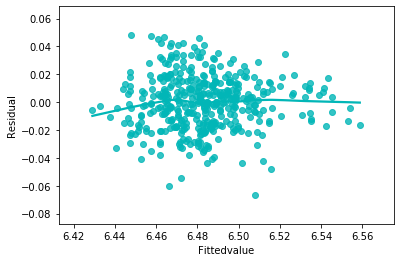

In [67]:
sns.regplot(model3_fit.fittedvalues, 
                model3_fit.resid, 
                data=df, 
                lowess=True,  
                color='#01B6B7')

plt.xlabel('Fittedvalue')
plt.ylabel('Residual')

In [68]:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(model3_fit)
lzip(name, test)

[('t value', 19.104283757713628), ('p value', 7.230829376569102e-59)]

### Independence

Durbin-Watson:                   0.972

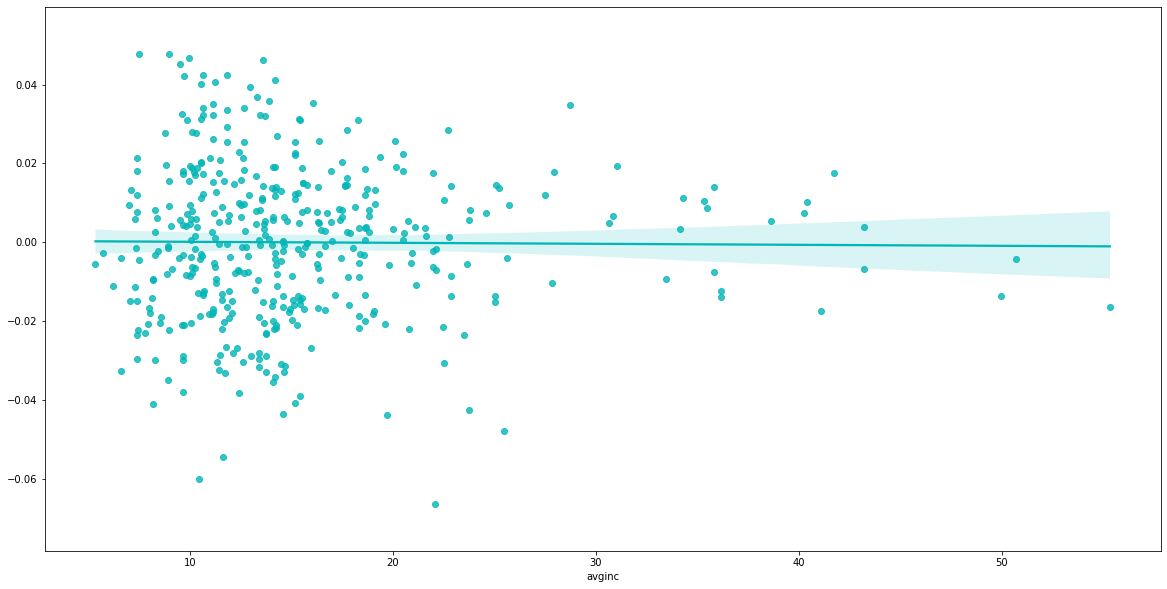

In [69]:
plt.rc('figure', figsize=(20,10))

sns.regplot(df['avginc'], model3_fit.resid , 
                  data=df,  color='#01B6B7')

### Normality

In [71]:
jarque = sms.jarque_bera(model3_fit.resid)

names = ['Test stattics', 'p-value' , 'skew', 'kurtosis']
lzip(names, jarque)

[('Test stattics', 0.8856399073699899),
 ('p-value', 0.6422228265323846),
 ('skew', -0.09571830973640676),
 ('kurtosis', 3.1181525092060163)]

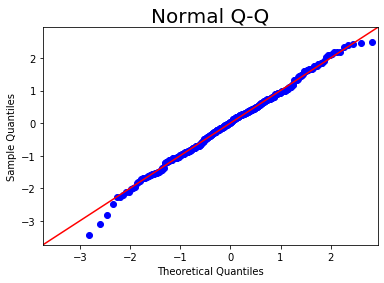

In [73]:
plt.rc('figure', figsize=(6,4))
probplot  = smg.qqplot(model3_fit.resid, fit=True, line="45")

plt.title('Normal Q-Q', fontsize=20)
plt.show()

### Heteroskedascity

In [76]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]

test = het_white(model3_fit.resid, model3_fit.model.exog)

lzip(name, test)

[('Lagrange multiplier statistic', 6.465177397798771),
 ('p-value', 0.039455228765083505),
 ('f-value', 3.2596758816070572),
 ('f p-value', 0.03938155975048735)]